# San Francisco Data Analysis 

### Based on Location Data. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/kaggle/input/sf-parks/SF_Park_Scores.csv
Libraries imported.


In [2]:
df = pd.read_csv('/kaggle/input/sf-parks/SF_Park_Scores.csv')
df.head()

ParkID   PSA                       Park      FQ  Score     Facility Type  \
0      86  PSA4           Carl Larsen Park  FY05Q3  0.795  Basketball Court   
1      13  PSA4  Junipero Serra Playground  FY05Q3  0.957        Ball Field   
2       9  PSA4     Rolph Nicol Playground  FY05Q3  0.864     Dog Play Area   
3     117  PSA2               Alamo Square  FY05Q4  0.857          Restroom   
4      60  PSA6   Jose Coronado Playground  FY05Q4  0.859  Basketball Court   

                      Facility Name                  Address State  Zipcode  \
0      Ocean View Basketball Courts     Capitol & Montana St    CA  94112.0   
1                  Glen ball fields  Diamond & Farnum Street    CA  94131.0   
2            Douglass dog play area   26th & Douglass Street    CA  94114.0   
3                  Gilman Bathrooms    Gilman Ave & Griffith    CA  94124.0   
4  GGP1 Panhandle Basketball Courts      Stanyan & Great Hwy    CA  94117.0   

   Floor Count    Square Feet  Perimeter Length     Acres   Longitude  \
0          NaN    5572.020314        311.982228  0.127916 -122.456708   
1          NaN  124520.486259       1891.675445  2.858608 -122.440592   
2          NaN   70655.337234       1153.019646  1.622030 -122.438895   
3          NaN     378.668603         94.257319  0.008693 -122.388772   
4          NaN    4645.553645        279.465313  0.106648 -122.448380   

    Latitude  
0  37.716335  
1  37.736008  
2  37.746741  
3  37.717179  
4  37.772304

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5494 entries, 0 to 5493
Data columns (total 16 columns):
ParkID              5494 non-null int64
PSA                 5494 non-null object
Park                5494 non-null object
FQ                  5494 non-null object
Score               5494 non-null float64
Facility Type       4719 non-null object
Facility Name       4719 non-null object
Address             4719 non-null object
State               4719 non-null object
Zipcode             4719 non-null float64
Floor Count         1324 non-null float64
Square Feet         4719 non-null float64
Perimeter Length    4719 non-null float64
Acres               4719 non-null float64
Longitude           4719 non-null float64
Latitude            4719 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 686.9+ KB


In [4]:
df.isnull().sum(axis = 0)

ParkID                 0
PSA                    0
Park                   0
FQ                     0
Score                  0
Facility Type        775
Facility Name        775
Address              775
State                775
Zipcode              775
Floor Count         4170
Square Feet          775
Perimeter Length     775
Acres                775
Longitude            775
Latitude             775
dtype: int64

In [5]:
df = df.rename(columns={'Facility Type':'FacilityType','Square Feet':'SquareFeet','Perimeter Length':'PerimeterLength'})

In [6]:
df.tail()

ParkID   PSA                        Park      FQ  Score  \
5489     151  PSA1  Alice Marble Tennis Courts  FY14Q4  0.985   
5490      28  PSA3           John McLaren Park  FY14Q4  0.769   
5491     170  PSA1           Woh Hei Yuen Park  FY14Q4  0.900   
5492     145  PSA1     Ina Coolbrith Mini Park  FY14Q4  0.840   
5493       4  PSA5      Walter Haas Playground  FY14Q4  0.767   

         FacilityType                Facility Name              Address State  \
5489         Restroom  Marina Green Bathrooms East          Marina Blvd    CA   
5490       Ball Field         Parkside ball fields   28th Ave & Vicente    CA   
5491  Activity Center        GGP3 County Fair Bldg  Stanyan & Great Hwy    CA   
5492         Restroom  Noe Valley Courts Bathrooms   24th & Douglass St    CA   
5493       Ball Field           Balboa ball fields     Ocean & San Jose    CA   

      Zipcode  Floor Count     SquareFeet  PerimeterLength     Acres  \
5489  94123.0          1.0     494.310709        93.513952  0.011348   
5490  94116.0          NaN  104340.628735      1513.141710  2.395341   
5491  94117.0          1.0   28191.724791      1359.813257  0.647196   
5492  94114.0          1.0     391.332099        98.012448  0.008984   
5493  94112.0          NaN  223812.895502      5432.156001  5.138058   

       Longitude   Latitude  
5489 -122.434531  37.806461  
5490 -122.484301  37.738385  
5491 -122.467165  37.766564  
5492 -122.439218  37.751485  
5493 -122.445324  37.724026

In [7]:
park_data = df

In [8]:
all_data_na = (park_data.isnull().sum() / len(park_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
Floor Count          75.900983
Latitude             14.106298
Longitude            14.106298
Acres                14.106298
PerimeterLength      14.106298
SquareFeet           14.106298
Zipcode              14.106298
State                14.106298
Address              14.106298
Facility Name        14.106298
FacilityType         14.106298

In [9]:
#Data Cleaning Process
# I will drop the Floor Count    
park_data = park_data.drop(["Floor Count"], axis = 1)
park_data = park_data.dropna()
#I will put 0 for numeric data
park_data["Latitude"] = park_data["Latitude"].fillna(0)
park_data["Longitude"] = park_data["Longitude"].fillna(0)
park_data["Acres"] = park_data["Acres"].fillna(0)
park_data["Perimeter Length"] = park_data["PerimeterLength"].fillna(0)
park_data["Square Feet"] = park_data["SquareFeet"].fillna(0)
park_data["Zipcode"] = park_data["Zipcode"].fillna(0)
#I will put None for strings
park_data["State"] = park_data["State"].fillna("None")
park_data["Address"] = park_data["Address"].fillna("None")
park_data["Facility Name"] = park_data["Facility Name"].fillna("None")
park_data["FacilityType"] = park_data["FacilityType"].fillna("None")

In [10]:
#info about the dataset
park_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4719 entries, 0 to 5493
Data columns (total 17 columns):
ParkID              4719 non-null int64
PSA                 4719 non-null object
Park                4719 non-null object
FQ                  4719 non-null object
Score               4719 non-null float64
FacilityType        4719 non-null object
Facility Name       4719 non-null object
Address             4719 non-null object
State               4719 non-null object
Zipcode             4719 non-null float64
SquareFeet          4719 non-null float64
PerimeterLength     4719 non-null float64
Acres               4719 non-null float64
Longitude           4719 non-null float64
Latitude            4719 non-null float64
Perimeter Length    4719 non-null float64
Square Feet         4719 non-null float64
dtypes: float64(9), int64(1), object(7)
memory usage: 663.6+ KB


In [11]:
park_data.Zipcode.unique()

array([94112., 94131., 94114., 94124., 94117., 94116., 94127., 94110.,
       94121., 94118., 94122., 94134., 94102., 94107., 94103., 94108.,
       94115., 94133., 94111., 94123., 94109., 94132.])

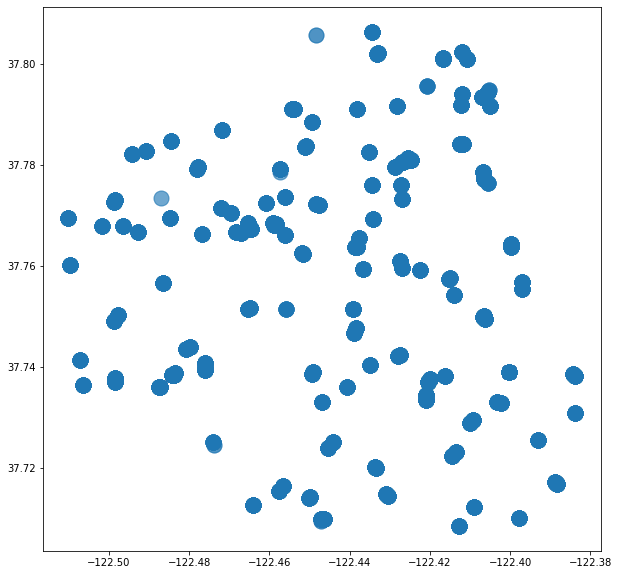

In [12]:

#the distrubution of parks in san francisco in terms of longtitude and latitude
longitude = list(park_data.Longitude) 
latitude = list(park_data.Latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 30)
plt.show()

In [13]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [14]:
address = 'san francisco'

geolocator = Nominatim(user_agent="san francisco")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of san francisco are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of san francisco are 37.7790262, -122.4199061.


In [15]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(park_data['Latitude'], park_data['Longitude'], park_data['Park'], park_data['Score']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

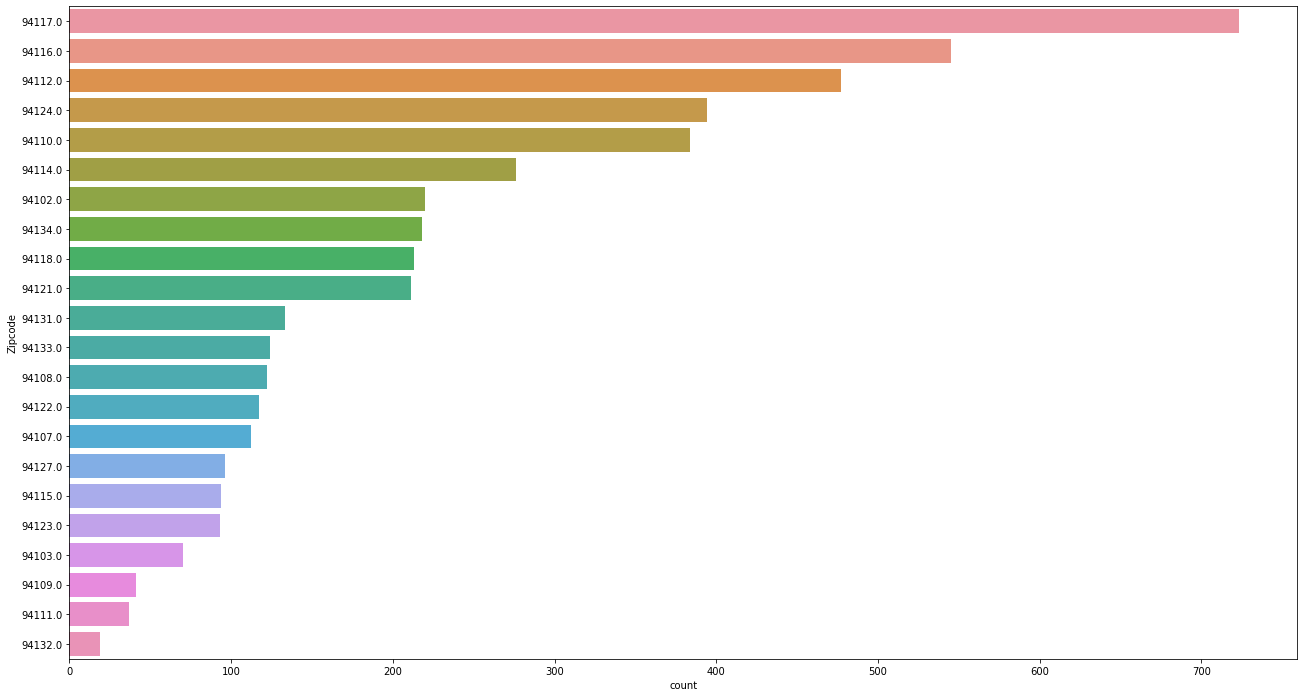

In [16]:
plt.subplots(figsize=(22,12))
sns.countplot(y=park_data['Zipcode'],order=park_data['Zipcode'].value_counts().index)
plt.show()

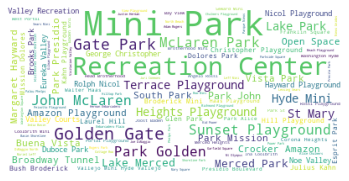

In [17]:
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(park_data['Park']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

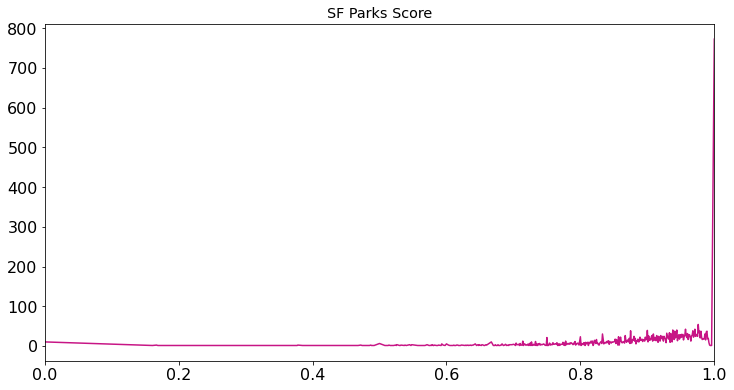

In [18]:
#SF Parks Facility Score points
park_data['Score'].value_counts().sort_index().plot.line(figsize=(12, 6),color='mediumvioletred',fontsize=16,title='SF Parks Score')

In [19]:
# Which Public Administation has the highest parks 
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True) # this is important

z = {'PSA1': 'PSA1', 'PSA2': 'PSA2', 'PSA3': 'PSA3','PSA4': 'PSA4','PSA5': 'PSA5','PSA6': 'PSA6','GGP': 'GGP'}
data = [go.Bar(
            x = park_data.PSA.map(z).unique(),
            y = park_data.PSA.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = park_data.PSA.value_counts().values
                        ),
           
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
CLIENT_ID = 'MIF2SPKPEZP0YIUKZMPBLCA3R4ESWCFJDYPFTPHV4PTFVXIO' # your Foursquare ID
CLIENT_SECRET = '5UOPEX5O43CRW0TZWYYOXST2VJBTPKIXAJWJ2TJVH3S23ZEK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MIF2SPKPEZP0YIUKZMPBLCA3R4ESWCFJDYPFTPHV4PTFVXIO
CLIENT_SECRET:5UOPEX5O43CRW0TZWYYOXST2VJBTPKIXAJWJ2TJVH3S23ZEK


In [22]:
manhattan_venues = getNearbyVenues(names=park_data['Park'].head(100),
                                   latitudes=park_data['Latitude'],
                                   longitudes=park_data['Longitude']
                                  )

Carl Larsen Park
Junipero Serra Playground
Rolph Nicol Playground
Alamo Square
Jose Coronado Playground
Little Hollywood Park
Lake Merced Park
Golden Gate Park
Grattan Playground
Francisco Park
Corona Heights
States Street Playground
Bernal Heights Recreation Center
Turk-Hyde Mini Park
Upper Noe Recreation Center
Holly Park
Betty Ann Ong Chinese Recreation Center
Washington-Hyde Mini Park
Ina Coolbrith Mini Park
Eureka Valley Recreation Center
Seward Mini Park
Golden Gate Park
Palega Recreation Center
Golden Gate Heights Park
Noe Valley Courts
George Christopher Playground
Douglass Playground
Mission Playground
Angelo J. Rossi Playground
Fulton Playground
Prentiss Mini Park
Cabrillo Playground
10th Avenue-Clement Mini Park
Richmond Recreation Center
Aptos Playground
Rolph Nicol Playground
Jackson Playground
Potrero Hill Recreation Center
Cayuga-Lamartine Mini Park
St. Mary's Recreation Center
Golden Gate Park
Portsmouth Square
Father Alfred E. Boeddeker Park
Crocker Amazon Playground
J

KeyError: 'groups'

In [23]:
print(manhattan_venues.shape)
manhattan_venues.head()

NameError: name 'manhattan_venues' is not defined

In [24]:
manhattan_venues.groupby('Neighborhood').count()

NameError: name 'manhattan_venues' is not defined

In [25]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

NameError: name 'manhattan_venues' is not defined

In [26]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

NameError: name 'manhattan_venues' is not defined

In [27]:
manhattan_onehot.shape

NameError: name 'manhattan_onehot' is not defined

In [28]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

NameError: name 'manhattan_onehot' is not defined

In [29]:
manhattan_grouped.shape

NameError: name 'manhattan_grouped' is not defined

In [30]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

NameError: name 'manhattan_grouped' is not defined

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

NameError: name 'manhattan_grouped' is not defined

## Cluster Neighborhoods

In [33]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

NameError: name 'manhattan_grouped' is not defined

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#park_data.drop(['Cluster Labels'], axis=1)
manhattan_merged = park_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Park')

manhattan_merged.head() # check the last columns!

NameError: name 'kmeans' is not defined

In [35]:
address = 'san francisco'

geolocator = Nominatim(user_agent="san francisco")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of san francisco are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of san francisco are 37.7790262, -122.4199061.


In [36]:
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Park'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[kcluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'manhattan_merged' is not defined

## Examine Clusters

#### Cluster 1

In [37]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 2

In [38]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 3

In [39]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 4

In [40]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 5

In [41]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

## By the Observations and Analysis of Data. Following are the findings
* Public Administation PSA4 has most parks
* Park Play ground are the most used workds in it
* Clusters are formed so that easily group can be classified